In [151]:
import pandas as pd
import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [129]:
file = open('Distancias.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
rows = []

for row in csvreader:
    rows.append(row)


file2 = open('Tiempos.csv')
csvreader2 = csv.reader(file2)
header2 = []
header2 = next(csvreader2)
rows2 = []

for row in csvreader2:
    rows2.append(row)

for city in range(len(rows2)):
    for time in range(1,len(rows2[city])):
        if (city == time - 1):
            continue
        temp = rows2[city][time].split(':')
        hours = int(temp[0])
        minutes = int(temp[1])
        rows2[city][time] = (hours * 60) + minutes

with open('EdgesDistances.csv', 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting = csv.QUOTE_NONNUMERIC)
    wr.writerow(['Origen', 'Destino', 'Distancia', 'Tiempo'])
    for city in range(len(rows)):
        for city2 in range(1, len(header)):
            if city == city2 - 1:
                continue
            # print(rows[city][0], header[city2], rows[city][city2], city, city2)
            wr.writerow([rows[city][0], header[city2],int(rows[city][city2]), int(rows2[city][city2])])


In [130]:
df = pd.read_csv('EdgesDistances.csv')

In [131]:
df

,Origen,Destino,Distancia,Tiempo
0,Bogota,Cali,463,387
1,Bogota,Medellin,419,345
2,Bogota,Barranquilla,1009,724
3,Bogota,Cartagena,1052,814
4,Bogota,Cucuta,599,438
...,...,...,...,...
205,Armenia,Ibague,87,96
206,Armenia,Pasto,565,557
207,Armenia,Manizales,110,87
208,Armenia,Neiva,289,248


In [132]:
DG = nx.DiGraph()
for row in df.iterrows():
    DG.add_edge(row[1]["Origen"],
                row[1]["Destino"],
                Distancia=row[1]["Distancia"],
                Tiempo=row[1]["Tiempo"])

In [133]:
DG.nodes(data=True)

NodeDataView({'Bogota': {}, 'Cali': {}, 'Medellin': {}, 'Barranquilla': {}, 'Cartagena': {}, 'Cucuta': {}, 'Bucaramanga': {}, 'Pereira': {}, 'Santa Marta': {}, 'Ibague': {}, 'Pasto': {}, 'Manizales': {}, 'Neiva': {}, 'Villavicencio': {}, 'Armenia': {}})

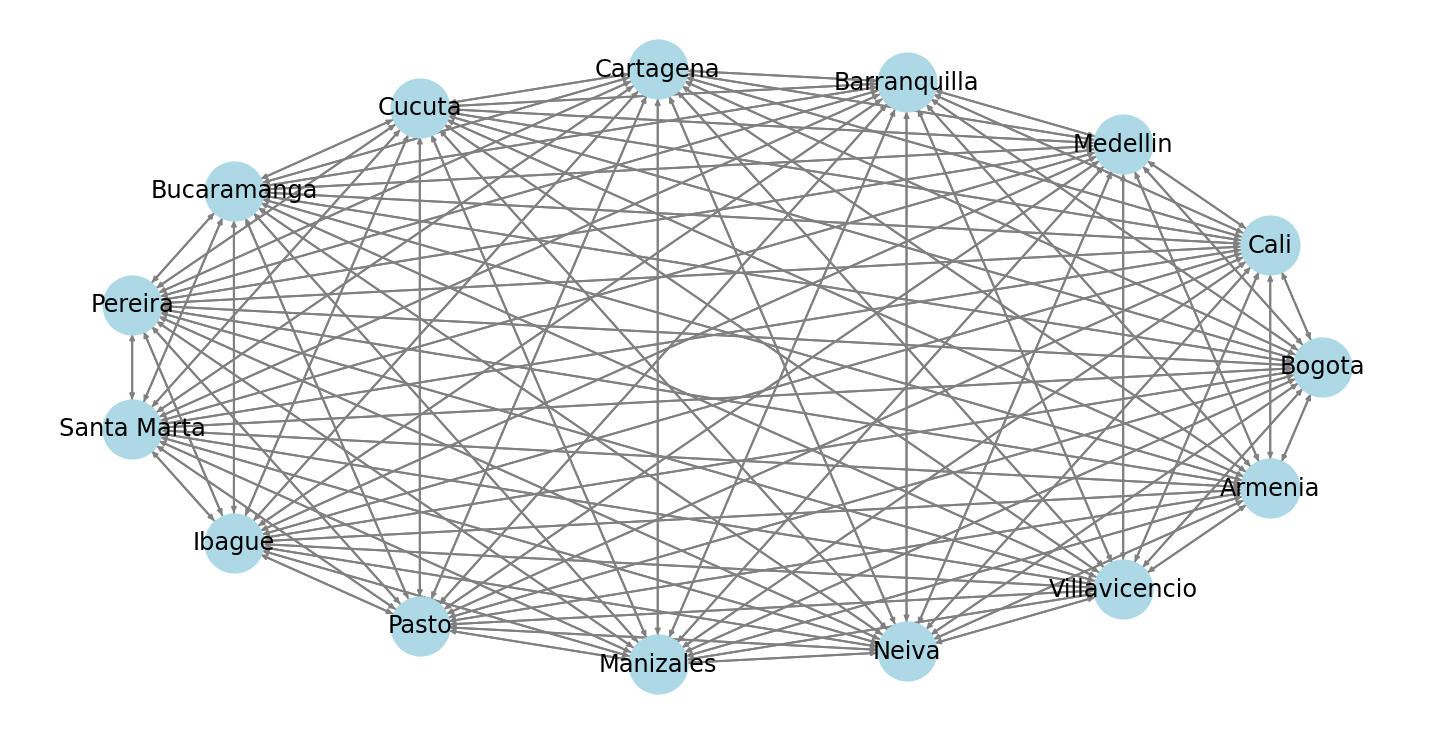

In [134]:
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=24,
                 width=2, with_labels=True, node_size=3500,
)

In [135]:
list(nx.all_shortest_paths(DG, source="Bucaramanga", target="Pasto", weight=None))

[['Bucaramanga', 'Pasto']]

In [136]:
list(nx.dijkstra_path(DG, source="Bucaramanga", target="Pasto", weight=None))

['Bucaramanga', 'Pasto']

In [167]:
start_time = time.time()
print(list(nx.dijkstra_path(DG, source="Bucaramanga", target="Pasto", weight='Distancia')))
print('El tiempo de ejecucion fue:', (time.time() - start_time))

['Bucaramanga', 'Pasto']
El tiempo de ejecucion fue: 0.0009996891021728516


In [175]:
start_time = time.time()
print(list(nx.dijkstra_path(DG, source="Bucaramanga", target="Pasto", weight='Tiempo')))
print('El tiempo de ejecucion fue:', (time.time() - start_time))

['Bucaramanga', 'Pasto']
El tiempo de ejecucion fue: 0.0009992122650146484


In [174]:
start_time = time.time()
print(list(nx.astar_path(DG, ("Bucaramanga"), ("Pasto"), weight="Distancia")))
print('El tiempo de ejecucion fue:', (time.time() - start_time))

['Bucaramanga', 'Pasto']
El tiempo de ejecucion fue: 0.0009999275207519531


In [178]:
start_time = time.time()
print(list(nx.astar_path(DG, ("Bucaramanga"), ("Pasto"), weight="Tiempo")))
print('El tiempo de ejecucion fue:', (time.time() - start_time))

['Bucaramanga', 'Pasto']
El tiempo de ejecucion fue: 0.0009891986846923828


In [141]:
def show_path(path):
    totalDistance = 0
    totalTime = 0
    
    for i in range(len(path)-1):
        origin = path[i]
        destination = path[i+1]
        Tiempo = DG[origin][destination]["Tiempo"]
        Distancia = DG[origin][destination]["Distancia"]
        
        totalDistance = totalDistance+Distancia
        totalTime = totalTime + Tiempo
        print('Entre %s -> %s: \n Distancia: %s km - Tiempo: %s min' % (
            origin, destination, Distancia, Tiempo
        ))
    
    print("\n     Distancia total: %s km - Tiempo Total: %s min \n" % (
            totalDistance, totalTime)
    )

In [142]:
show_path(['Bucaramanga', 'Pasto'])

Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 



In [143]:
def get_all_shortest_paths(DiGraph, origin, destination):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destination
    ))
    for weight in [None, "Distancia", "Tiempo"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origin,
                                          target=destination,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)

In [144]:
get_all_shortest_paths(DG, origin="Bucaramanga", destination="Pasto")

*** All shortest paths - Origen: Bucaramanga Destino: Pasto
* Ordenando por: None
   Camino óptimo: ['Bucaramanga', 'Pasto']
Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 

* Ordenando por: Distancia
   Camino óptimo: ['Bucaramanga', 'Pasto']
Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 

   Camino óptimo: ['Bucaramanga', 'Armenia', 'Pasto']
Entre Bucaramanga -> Armenia: 
 Distancia: 590 km - Tiempo: 477 min
Entre Armenia -> Pasto: 
 Distancia: 565 km - Tiempo: 557 min

     Distancia total: 1155 km - Tiempo Total: 1034 min 

* Ordenando por: Tiempo
   Camino óptimo: ['Bucaramanga', 'Pasto']
Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 



In [145]:
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=1, with_labels=True, node_size=3500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=24,
                width=3, with_labels=True, node_size=3000
           )
    plt.show()

In [148]:
def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "Distancia", "Tiempo"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origin),
                                  (destination),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)

*** Origen: Bucaramanga Destino: Pasto
 Ordenado por: None
   Camino óptimo: ['Bucaramanga', 'Pasto'] 
Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 

['Bucaramanga', 'Pasto']


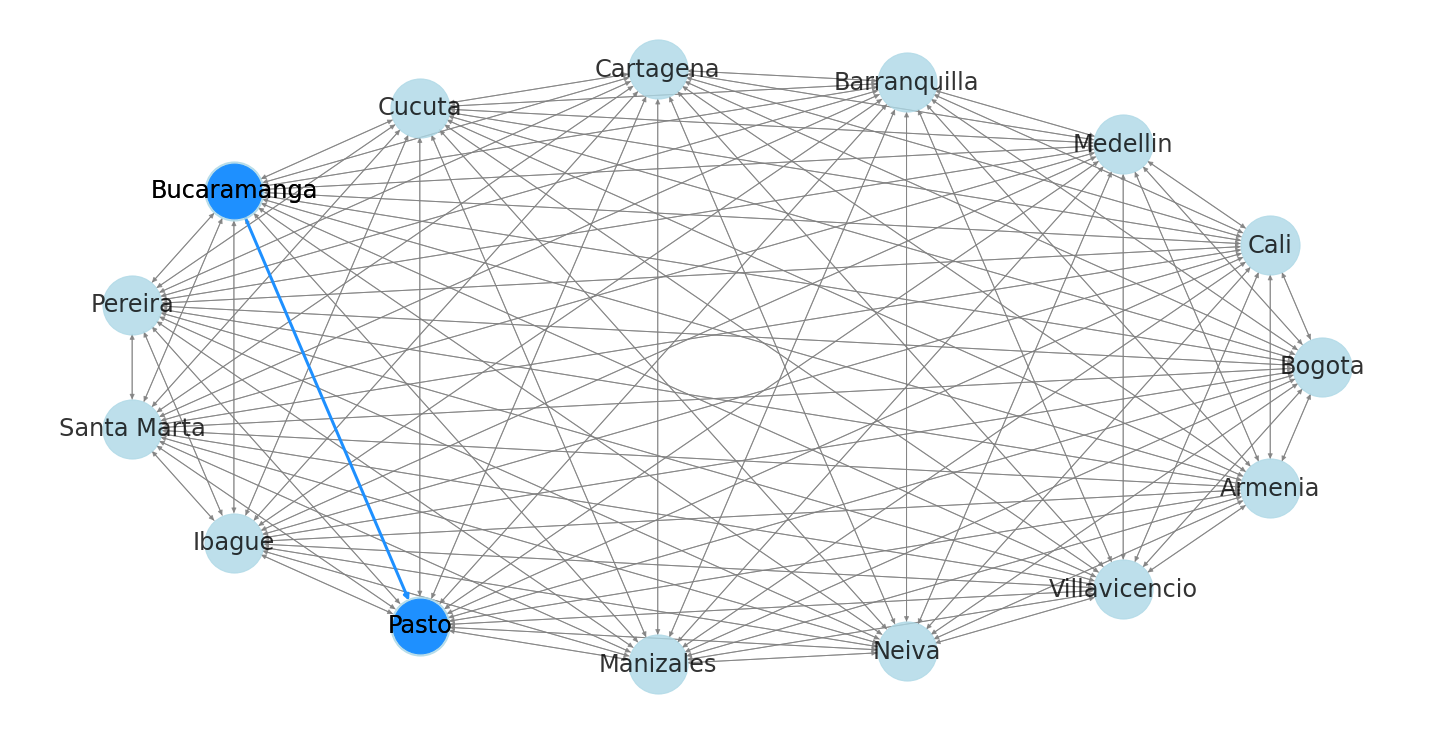

 Ordenado por: Distancia
   Camino óptimo: ['Bucaramanga', 'Pasto'] 
Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 

['Bucaramanga', 'Pasto']


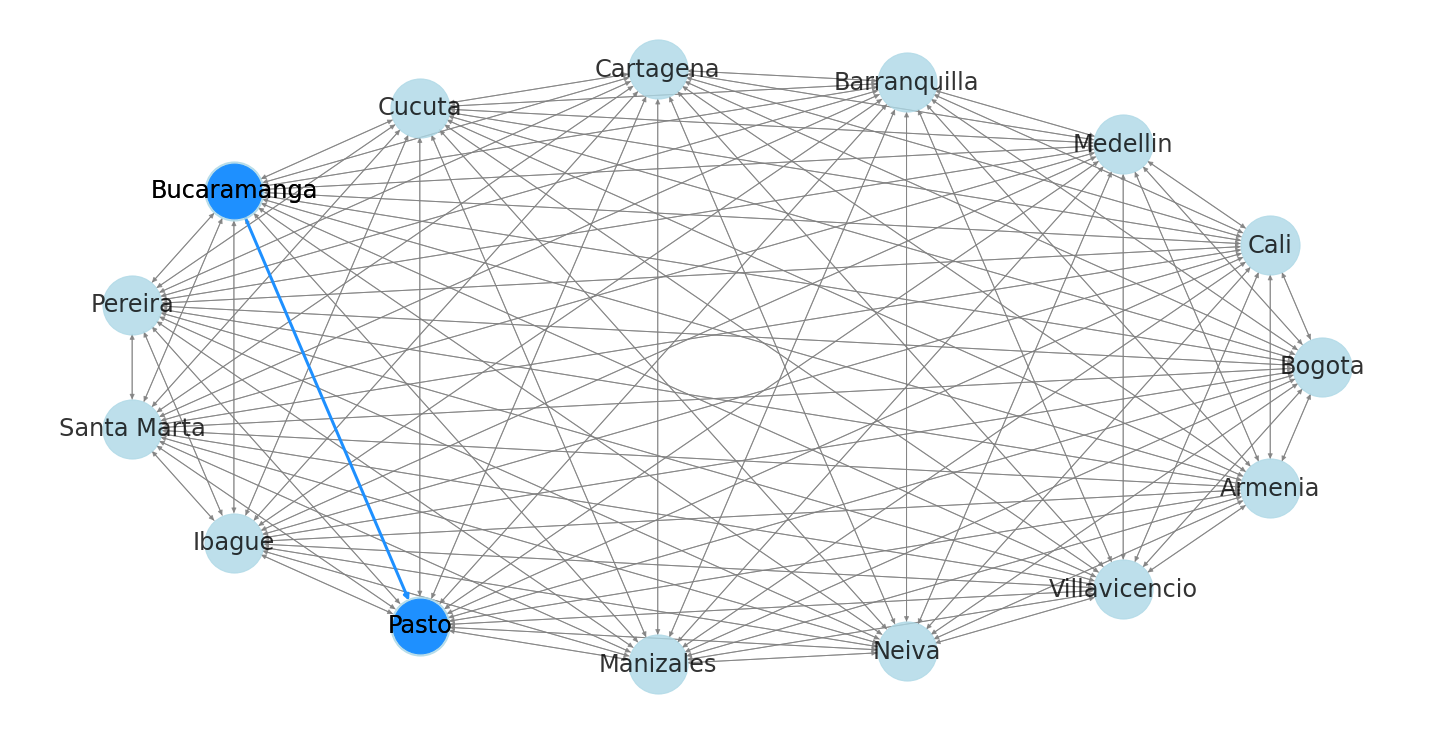

 Ordenado por: Tiempo
   Camino óptimo: ['Bucaramanga', 'Pasto'] 
Entre Bucaramanga -> Pasto: 
 Distancia: 1155 km - Tiempo: 953 min

     Distancia total: 1155 km - Tiempo Total: 953 min 

['Bucaramanga', 'Pasto']


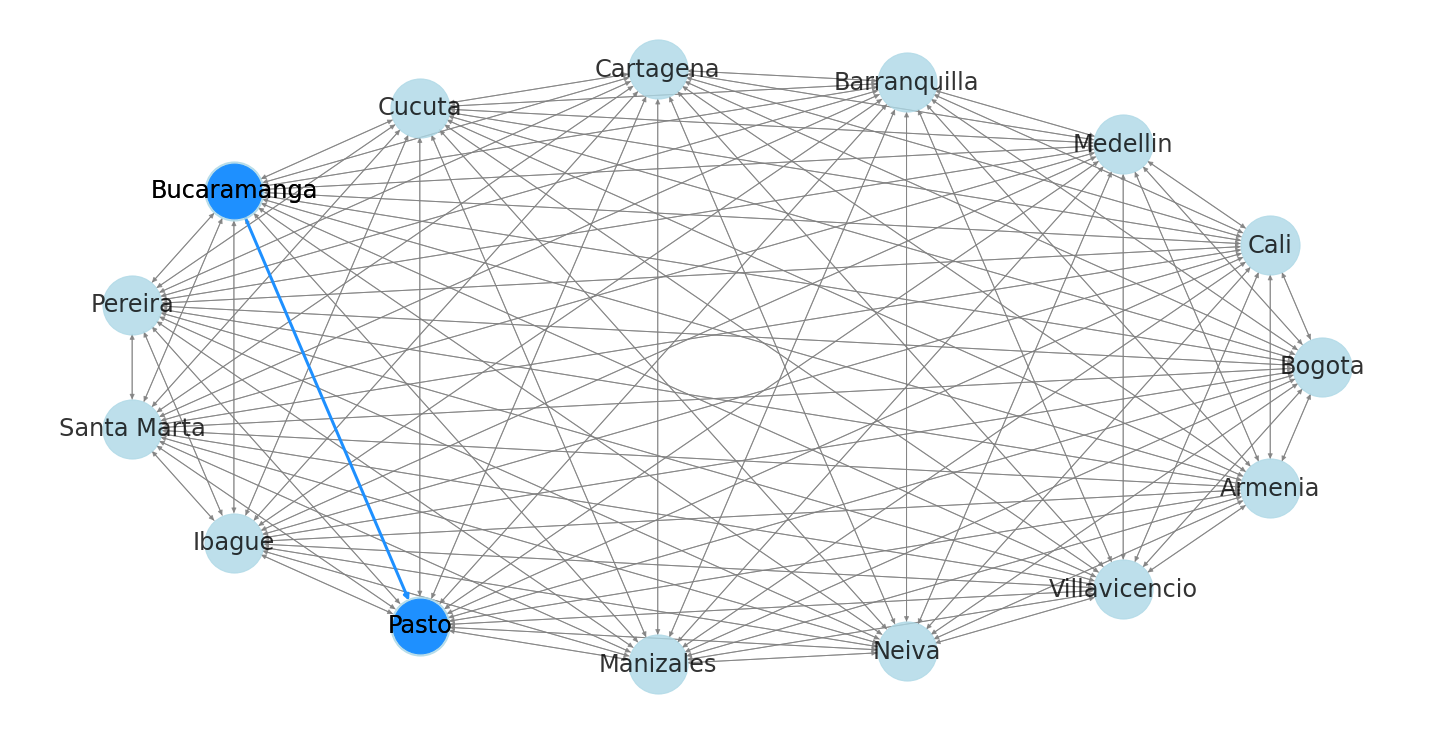

In [149]:
get_shortest_path(DG, origin="Bucaramanga", destination="Pasto")